In [18]:
import pandas as pd
import os
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import pickle
from matplotlib import pyplot
from plot_cdf import plot_cdf

## Look at outputs of ./gym

In [30]:
path_files = "outputs/"
files = os.listdir(path_files)
files

['out_5G_12mbps.txt',
 'out_main2.txt',
 'trace_example_duration_3000_output.txt',
 'trace_200k_duration_3000_output.txt',
 '5G_12mbps_dur_30000_lo_02.txt',
 '5G_12mbps_duration_3000_output.txt',
 'out_main4.txt',
 'out_main3.txt',
 'out_main.txt',
 'out_trace_300k.txt']

In [31]:
dict_df = {}
for name in (files):

    with open(os.path.join(path_files, name), "r") as f:
        a = []
        for line in f:
            if line.startswith("{"):
                a.append(json.loads(line))
                
    dict_df[name] = pd.DataFrame(a)

In [33]:
(dict_df['out_trace_300k.txt'] == dict_df['trace_200k_duration_3000_output.txt']).all()

ValueError: Can only compare identically-labeled DataFrame objects

In [34]:
len(dict_df['out_trace_300k.txt']), len(dict_df["out_main4.txt"])

(79, 79)

In [35]:
df = dict_df['out_trace_300k.txt']
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,116,24,0,1389,126,35,1,12648429
1,154,24,0,1390,126,35,2,12648429
2,193,24,0,1390,126,40,3,12648429
3,231,24,0,1390,126,45,4,12648429
4,270,24,0,1390,126,50,5,12648429
...,...,...,...,...,...,...,...,...
74,2821,24,0,1390,126,805,75,12648429
75,2859,24,0,1390,126,810,76,12648429
76,2898,24,0,1389,126,835,77,12648429
77,2936,24,0,1390,126,835,78,12648429


In [36]:
df.ssrc.unique()

array([12648429])

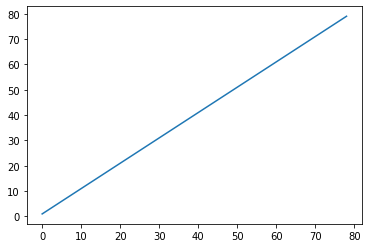

In [37]:
df[df.ssrc == 12648429].sequence_number.plot()

## Look at list of received packets

In [38]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
to_plot = df["arrival_time_ms"].diff().dropna()

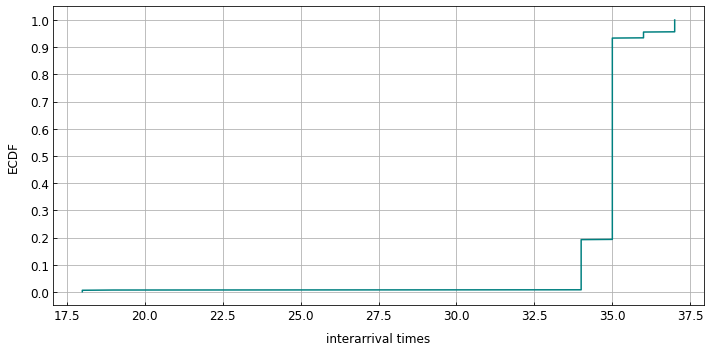

In [40]:
plot_cdf(to_plot, "interarrival times")

In [2]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

In [5]:
print(l_packets[0][0]["trace"])
print(len(l_packets[0][0]["list_of_packets"]))

/home/dena/Documents/Gym_RTC/gym-example/traces/trace_loss_pattern_3.json
53


In [6]:
df_packets = pd.DataFrame(l_packets[0][0]["list_of_packets"])
df_packets

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,47,24,0,1396,126,35,1,12648429
1,58,24,0,1397,126,45,2,12648429
2,72,24,0,1397,126,60,3,12648429
3,83,24,0,1397,126,70,4,12648429
4,97,28,0,1393,126,85,5,12648429
5,106,24,0,699,126,100,6,12648429
6,112,24,0,699,126,105,7,12648429
7,140,24,0,544,126,135,8,12648429
8,175,24,0,544,126,170,9,12648429
9,210,24,0,544,126,205,10,12648429


In [9]:
def test_one_ssrc(l_packets, num_episodes, num_epochs_per_episode):
    for episode in range(num_episodes):
        for epoch in range(num_epochs_per_episode):
            if len(pd.DataFrame(l_packets[episode][epoch]["list_of_packets"]).ssrc.unique()) > 1:
                print(f"More than one ssrc in episode {episode} epoch {epoch}")
            else:
                print("All fine")

In [10]:
test_one_ssrc(l_packets, 1, 4)

More than one ssrc in episode 0 epoch 0
More than one ssrc in episode 0 epoch 1
More than one ssrc in episode 0 epoch 2
More than one ssrc in episode 0 epoch 3


In [11]:
df1 = pd.DataFrame(l_packets[0][0]["list_of_packets"])
df1

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,47,24,0,1396,126,35,1,12648429
1,58,24,0,1397,126,45,2,12648429
2,72,24,0,1397,126,60,3,12648429
3,83,24,0,1397,126,70,4,12648429
4,97,28,0,1393,126,85,5,12648429
5,106,24,0,699,126,100,6,12648429
6,112,24,0,699,126,105,7,12648429
7,140,24,0,544,126,135,8,12648429
8,175,24,0,544,126,170,9,12648429
9,210,24,0,544,126,205,10,12648429


In [12]:
df1.ssrc.unique()

array([ 12648429, 195939069])

In [17]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]])

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,47,24,0,1396,126,35,1,12648429
1,58,24,0,1397,126,45,2,12648429
2,72,24,0,1397,126,60,3,12648429
3,83,24,0,1397,126,70,4,12648429
4,97,28,0,1393,126,85,5,12648429
5,106,24,0,699,126,100,6,12648429
6,112,24,0,699,126,105,7,12648429
7,140,24,0,544,126,135,8,12648429
8,175,24,0,544,126,170,9,12648429
9,210,24,0,544,126,205,10,12648429


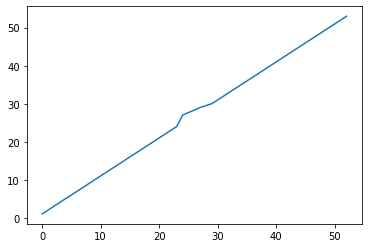

In [13]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]]).sequence_number.plot()

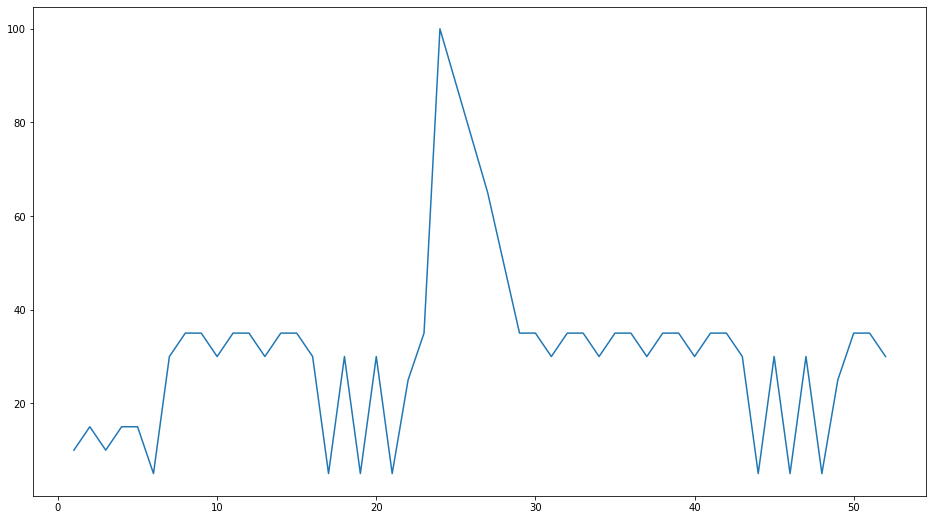

In [14]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]]).send_time_ms.diff().plot(figsize=(16,9))

In [11]:
pd.DataFrame(l_packets[0][3]["list_of_packets"])

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,46,24,0,1377,126,35,1,12648429
1,61,24,0,1377,126,50,2,12648429
2,76,24,0,1377,126,65,3,12648429
3,96,28,0,1373,126,85,4,12648429
4,105,24,0,551,126,100,5,12648429
5,110,24,0,551,126,105,6,12648429
6,139,24,0,499,126,135,7,12648429
7,174,24,0,499,126,170,8,12648429
8,209,24,0,499,126,205,9,12648429
9,240,24,0,601,126,235,10,12648429


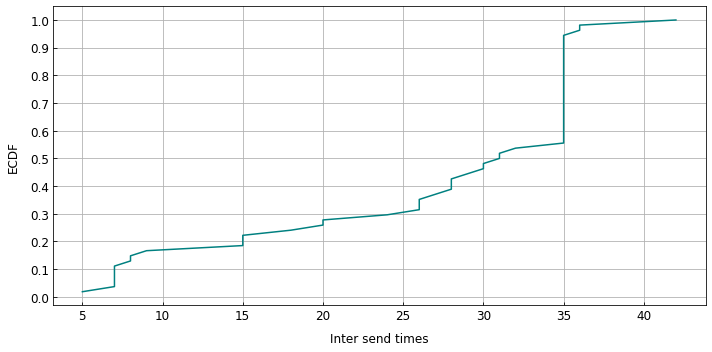

In [12]:
to_plot = pd.DataFrame(l_packets[0][3]["list_of_packets"]).arrival_time_ms.diff().dropna()
plot_cdf(to_plot, "Inter send times")
# pyplot.xscale('log')

## Plot CDF of packet interarrivals per epoch per ssrc

In [39]:
len(l_packets[0])

250

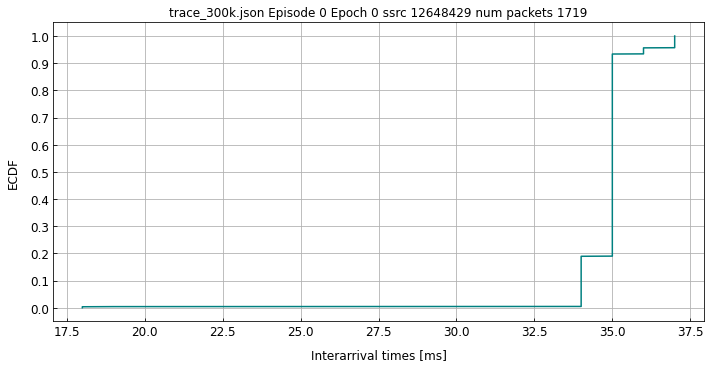

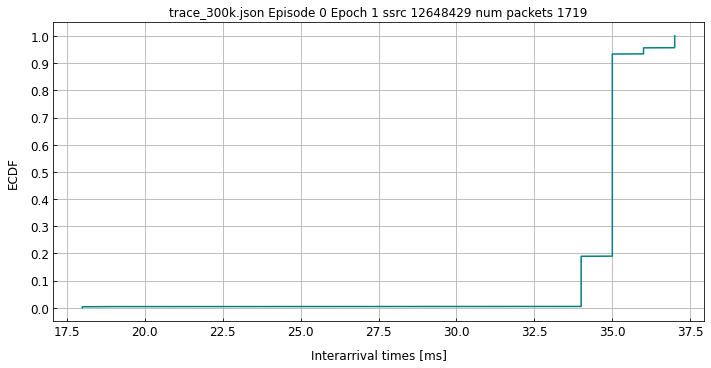

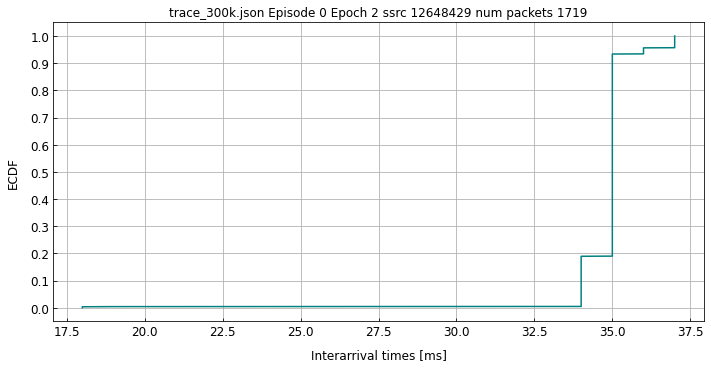

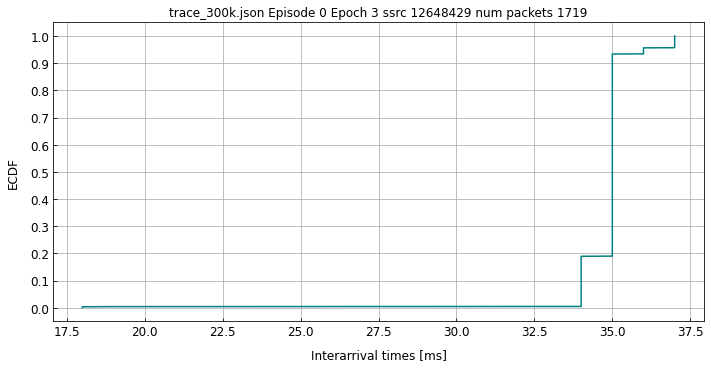

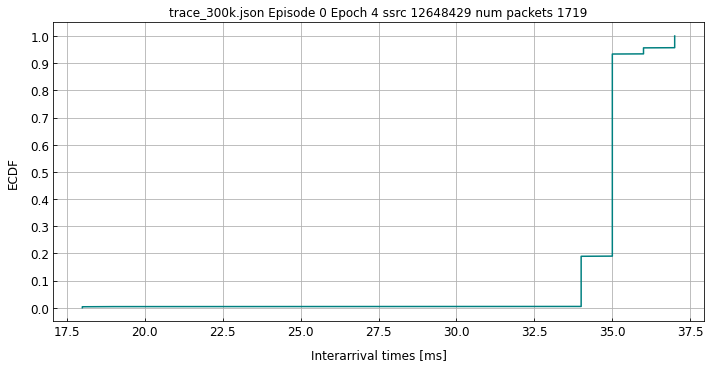

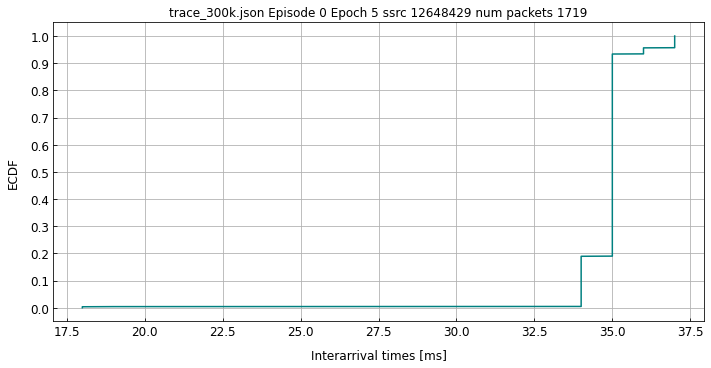

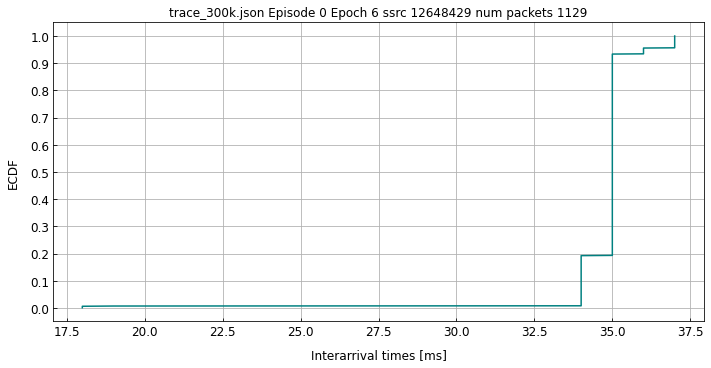

In [15]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

time_step = 100
max_num_episodes = 1
to_plot_big = []

for episode in range(max_num_episodes):
    num_epochs = len(l_packets[episode])
    for epoch in range(num_epochs)[:10]:
        trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
        df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

        for i in range(len(df_packets.ssrc.unique())):
            ssrc = df_packets["ssrc"].unique()[i]
            df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
            to_plot = df["arrival_time_ms"].diff().dropna()
            
            #Plot only flows with more than 10 packets
            if len(df) >= 10:
                
                plot_cdf(to_plot, "Interarrival times [ms]")
                plt.title(f"{trace_file} Episode {episode} Epoch {epoch} ssrc {ssrc} num packets {len(df)}")
                
            to_plot_big.append(to_plot)
    

(0.0, 100.0)

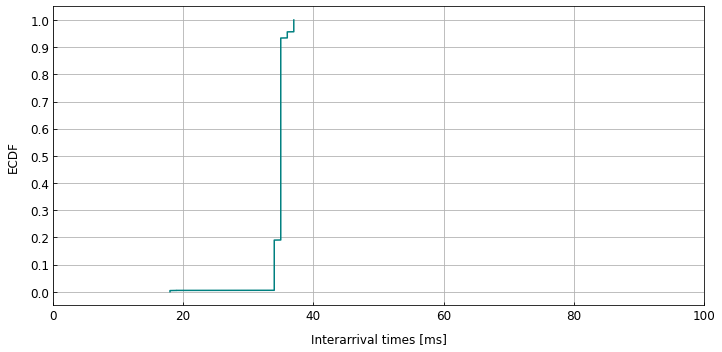

In [16]:
to_plot_big = [item for sublist in to_plot_big for item in sublist]
plot_cdf(to_plot_big, "Interarrival times [ms]")
plt.xlim(0,100)

In [17]:
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])
df_packets

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,112,24,0,1251,126,35,1,12648429
1,147,24,0,1252,126,45,2,12648429
2,182,24,0,1252,126,60,3,12648429
3,217,24,0,1252,126,75,4,12648429
4,252,28,0,1248,126,85,5,12648429
...,...,...,...,...,...,...,...,...
1124,39232,24,0,1251,126,37369,1125,12648429
1125,39267,24,0,1251,126,37404,1126,12648429
1126,39302,24,0,1251,126,37434,1127,12648429
1127,39337,24,0,1251,126,37469,1128,12648429
